In [629]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## Задача 1.

В результате эксперимента получена выборка объема $n=79$:

In [498]:
sample = [2, 4, 2, 4, 3, 3, 3, 2, 0, 6, 1, 2, 3, 2, 2, 
          4, 3, 3, 5, 1, 0, 2, 4, 3, 2, 2, 3, 3, 1, 3, 
          3, 3, 1, 1, 2, 3, 1, 4, 3, 1, 7, 4, 3, 4, 2, 
          3, 2, 3, 3, 1, 4, 3, 1, 4, 5, 3, 4, 2, 4, 5, 
          3, 6, 4, 1, 3, 2, 4, 1, 3, 1, 0, 0, 4, 6, 4, 
          7, 4, 1, 3]

df = pd.DataFrame(sample, columns=['x_i'])

#### Построим статистический ряд

In [499]:
df = df.value_counts().reset_index().sort_values(by='x_i').rename({0:'n_i'}, axis=1)

df

,x_i,n_i
4,0,4
3,1,13
2,2,14
0,3,24
1,4,16
5,5,3
6,6,3
7,7,2


#### Построим полигон частот

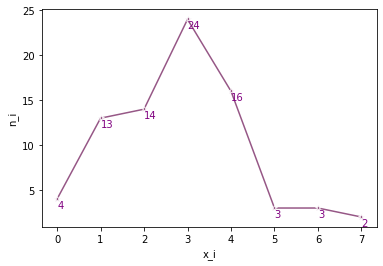

In [500]:
g = sns.lineplot(data=df,  x='x_i', y='n_i', marker='*', color='#965786')
g.set_xticks(df['x_i']) 
g.set_xticklabels(df['x_i'])

for x, y in zip(df['x_i'], df['n_i']):
    plt.text(x = x, y = y-1, s = '{:.0f}'.format(y), color = 'purple') 


plt.show()

#### Построим эмпирическую функцию распределения

In [501]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['s_i'] = df['w_i'].cumsum()

In [502]:
df

,x_i,n_i,w_i,s_i
4,0,4,0.051,0.051
3,1,13,0.165,0.215
2,2,14,0.177,0.392
0,3,24,0.304,0.696
1,4,16,0.203,0.899
5,5,3,0.038,0.937
6,6,3,0.038,0.975
7,7,2,0.025,1.000


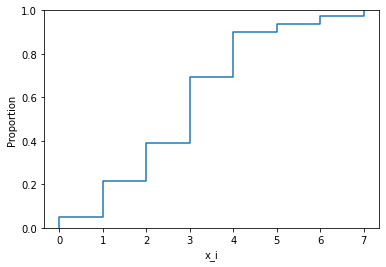

In [503]:
g = sns.ecdfplot(data=df,  x='x_i', weights='w_i')
g.set_xticks(df['x_i']) 
g.set_xticklabels(df['x_i'])

plt.show()

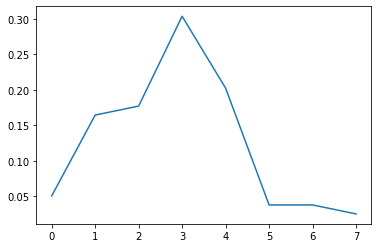

In [505]:
xk = df['x_i']
pk = df['w_i']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

#### Найдем выборочное среднее, диспрерсию и стандартное отклонение

In [536]:
mean = custm_dist.mean()
var = custm_dist.var()
std = custm_dist.std()

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,2.835,2.365,1.538


In [537]:
mean = (df['x_i'] * df['n_i']).sum() / df['n_i'].sum()
var = ((((df['x_i'] - mean)**2) * df['n_i']).sum()) / (df['n_i'].sum())
std = np.sqrt(var)

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,2.835,2.365,1.538
